# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
import re
import math
import collections
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings;warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
df = pd.read_csv('main_task.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [4]:
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032


### Функции для работы

In [5]:
#Функция для получения списка в столбце
def list_for_object (variable):
    result = []
    pattern = re.compile('\dd\s\dd')
    if type(variable) == str:
        list_work = re.sub('\s\'|\'','', variable).split(',')
        for i in list_work:
            var = re.sub('\]','', i)
            var_2 = re.sub('\[','', var)
            var_3 = var_2.lstrip(' ')
            result.append(var_3)
    else: result.append('No_name')
    return result

In [6]:
#функция для заполнения type_cusin
def var_for_type_cusin (list_analysis):
    s = set()
    for i in list_analysis:
        if i in top_cuisin:
            s.add(i)
        else: s.add('other')
    s = list(s)
    result = s[0]
    for j in range(1,len(s)):
        result += ','+s[j]
    return result

### Анализ значений в столбце "Price Range"

In [7]:
df['Price Range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

In [8]:
#Заменим значения NaN на '0'
df['Price Range'] = df['Price Range'].fillna(0)

In [9]:
df['Price Range'].unique()

array(['$$ - $$$', 0, '$$$$', '$'], dtype=object)

In [10]:
df[df['Price Range'] == '$$ - $$$'].count()

Restaurant_id        18412
City                 18412
Cuisine Style        18412
Ranking              18412
Rating               18412
Price Range          18412
Number of Reviews    18197
Reviews              18412
URL_TA               18412
ID_TA                18412
dtype: int64

#### В столбце "Price Range" представлены ординальными признаками. Значения данных:
   - \\$ - Низкий уровень цен; 
   - \\$\\$ - \\$\\$\\$- средний уровень цен;
   - \\$\\$\\$\\$ - высокий уровень цен.

In [11]:
# Зашифруем ординальные признаки цифрами. Будем использовать значения от 1 одного до 3 
#(цены в ресторане с высоким уровнем цен выше, чем в ресторане с низким уровнем цен)
dict_prise = {'$': 1, '$$ - $$$' : 2, '$$$$' : 3, 0 : 0}

In [12]:
df['prise_range_key'] = df['Price Range'].replace(to_replace = dict_prise)
print(df[['Price Range', 'prise_range_key']])

      Price Range  prise_range_key
0        $$ - $$$                2
1               0                0
2            $$$$                3
3               0                0
4        $$ - $$$                2
...           ...              ...
39995    $$ - $$$                2
39996    $$ - $$$                2
39997           0                0
39998    $$ - $$$                2
39999    $$ - $$$                2

[40000 rows x 2 columns]


In [13]:
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2
1,id_1535,Stockholm,NaN,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0


### Количество уникальных значений в столбце 'Сity'

In [14]:
city = df['City'].unique()#City - категориальный признак

In [15]:
len(list(city))

31

### Анализ значений в столбце "Cuisine Style" - категориальный признак

In [16]:
print(list_for_object(df['Cuisine Style'][0]))#проверка работы функции list_for_object

['European', 'French', 'International']


In [17]:
#Замена значений в столбце "Cuisine Style"
df['Cuisine Style'] = df['Cuisine Style'].apply(list_for_object)
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2
1,id_1535,Stockholm,[No_name],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0


In [18]:
#определение количеста типов кухонь
set_cuisen_style = set()
for i in df['Cuisine Style']:
    for j in i:
        set_cuisen_style.add(j)
len(set_cuisen_style) - 1  #исключаем 'No_name'

125

In [19]:
quantity_cuisen_style = {}  # создаём пустой словарь для хранения информации об типах предсавленных кухонь
for item in set_cuisen_style:  # перебираем список кухонь
    quantity_cuisen_style[item] = 0 # добавляем в словарь ключ, соответствующий очередной кухне
for i in df['Cuisine Style']:   # перебираем список кухонь
    for item in i:   # и перечень кухонь для каждого ресторана
        quantity_cuisen_style[item] += 1   # увеличиваем значение нужного ключа в словаре на 1

In [20]:
#Определение популярной кухни
for i in quantity_cuisen_style.keys():
    if quantity_cuisen_style[i] == max(quantity_cuisen_style.values()):
        print(i)

Vegetarian Friendly


In [21]:
print(round(df['Cuisine Style'].apply(lambda x: len(x)).mean(), 1)) #средняя величина количества кухонь в ресторане

2.6


In [22]:
### Создаем признак - количество кухонь в рестаране
df['quantity_cs'] = df['Cuisine Style'].apply(lambda x: len(x))

#### Создаем dummy-переменную
Выберим top кухонь для уменьшения количества переменных

In [23]:
display(quantity_cuisen_style) #словарь с типами кухонь и количеством ресторанах в которых она представлена

{'Polynesian': 2,
 'Danish': 177,
 'Venezuelan': 40,
 'Romanian': 10,
 'Russian': 58,
 'Azerbaijani': 2,
 'Barbecue': 555,
 'Middle Eastern': 782,
 'Arabic': 51,
 'Indonesian': 59,
 'Afghani': 22,
 'Italian': 5964,
 'Balti': 83,
 'Cambodian': 20,
 'Turkish': 444,
 'Czech': 595,
 'Wine Bar': 697,
 'Armenian': 14,
 'Swedish': 171,
 'Greek': 604,
 'Lebanese': 329,
 'Sri Lankan': 25,
 'Persian': 53,
 'International': 1584,
 'Asian': 3011,
 'Bangladeshi': 76,
 'Norwegian': 75,
 'Dutch': 294,
 'Belgian': 270,
 'Diner': 295,
 'Canadian': 5,
 'Healthy': 620,
 'Street Food': 263,
 'Southwestern': 17,
 'Xinjiang': 1,
 'Thai': 743,
 'Tunisian': 21,
 'European': 10060,
 'German': 662,
 'Gastropub': 471,
 'Japanese': 1464,
 'Hawaiian': 21,
 'Gluten Free Options': 4113,
 'Cajun & Creole': 20,
 'British': 1595,
 'Nepali': 83,
 'Soups': 494,
 'Scandinavian': 342,
 'Scottish': 163,
 'Korean': 167,
 'Grill': 490,
 'Brew Pub': 225,
 'Steakhouse': 573,
 'Latvian': 1,
 'Indian': 1041,
 'Central Asian': 12,

In [24]:
#Создадим Data Frame для дальнейшей сортировки
quantity_style = pd.DataFrame(data = [quantity_cuisen_style])
quantity_style = quantity_style.transpose()
display (quantity_style)

,0
Polynesian,2
Danish,177
Venezuelan,40
Romanian,10
Russian,58
...,...
Salvadoran,1
Spanish,2798
Albanian,8
Latin,302


In [25]:
quantity_style = quantity_style.sort_values(by = 0 , ascending = False)

In [26]:
cuisin_style_freqs = list(quantity_style[0])

In [27]:
top_сuisine_style = int(np.percentile(cuisin_style_freqs, 90))
top_cuisin = quantity_style[quantity_style[0] > top_сuisine_style]
len(top_cuisin)

13

Оставим кухни, встречающиеся в 90 процентов ресторанов

In [28]:
all_cuisin = quantity_style.index
top_cuisin = list(all_cuisin)[:len(top_cuisin)-1]
cuisen_to_throw_away = list(set(all_cuisin) - set(top_cuisin))
top_cuisin

['Vegetarian Friendly',
 'European',
 'No_name',
 'Mediterranean',
 'Italian',
 'Vegan Options',
 'Gluten Free Options',
 'Bar',
 'French',
 'Asian',
 'Pizza',
 'Spanish']

In [29]:
df['type_cuisin'] = df['Cuisine Style'].apply(var_for_type_cusin)

In [30]:
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key,quantity_cs,type_cuisin
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2,3,"European,French,other"
1,id_1535,Stockholm,[No_name],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,No_name


In [31]:
#создаем dummy-переменную
df_dummies = df['type_cuisin'].str.get_dummies(',')
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Asian                40000 non-null  int64
 1   Bar                  40000 non-null  int64
 2   European             40000 non-null  int64
 3   French               40000 non-null  int64
 4   Gluten Free Options  40000 non-null  int64
 5   Italian              40000 non-null  int64
 6   Mediterranean        40000 non-null  int64
 7   No_name              40000 non-null  int64
 8   Pizza                40000 non-null  int64
 9   Spanish              40000 non-null  int64
 10  Vegan Options        40000 non-null  int64
 11  Vegetarian Friendly  40000 non-null  int64
 12  other                40000 non-null  int64
dtypes: int64(13)
memory usage: 4.0 MB


### Анализ значений в столбце "Reviews" 

In [32]:
pattern = re.compile('\d\d/\d\d/\d{4}')  

In [33]:
#Добавим столбец date_ultimate_reviews
df['date_ultimate_reviews'] = df['Reviews'].apply(lambda x: \
   pd.to_datetime(re.findall(pattern, x)[0]) if len(re.findall(pattern, x)) >= 1 else None)    

In [34]:
#Добавим столбец date_penultimate_reviews
df['date_penultimate_reviews'] = df['Reviews'].apply(lambda x: \
     pd.to_datetime(re.findall(pattern, x)[1]) if len(re.findall(pattern, x)) == 2 else None)

In [35]:
df['date_ultimate_reviews'].sort_values(ascending = False)

26781   2018-02-26
30334   2018-02-26
12019   2018-02-26
22263   2018-02-26
22880   2018-02-26
           ...    
39981          NaT
39986          NaT
39988          NaT
39991          NaT
39994          NaT
Name: date_ultimate_reviews, Length: 40000, dtype: datetime64[ns]

In [36]:
df['time_delta'] = (df['date_ultimate_reviews'] - df['date_penultimate_reviews'])
df['time_delta'] = df['time_delta'].apply(lambda x: int(str(x)[:-14]) if len(str(x)) > 5 else 0)    

In [37]:
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key,quantity_cs,type_cuisin,date_ultimate_reviews,date_penultimate_reviews,time_delta
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2,3,"European,French,other",2017-12-31,2017-11-20,41
1,id_1535,Stockholm,[No_name],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,No_name,2017-07-06,2016-06-19,382


In [38]:
# Проверка максимального значения разницы между отзывами
df['time_delta'].max()

3207

In [39]:
display(df[df['time_delta'] == df['time_delta'].max()])

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key,quantity_cs,type_cuisin,date_ultimate_reviews,date_penultimate_reviews,time_delta
7990,id_10021,Paris,"[Japanese, Barbecue, Sushi]",10023.0,4.0,$,21.0,"[['Incredible buffet!', 'Used to be great, but...",/Restaurant_Review-g187147-d805046-Reviews-Yam...,d805046,1,3,other,2016-10-02,2007-12-22,3207


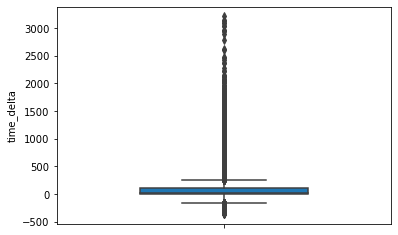

In [40]:
sns.boxplot(y = 'time_delta', data = df, saturation = 1, width = 0.5)

In [41]:
df[df['time_delta'] < 0].head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key,quantity_cs,type_cuisin,date_ultimate_reviews,date_penultimate_reviews,time_delta
6,id_1720,Milan,"[Italian, Pizza]",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504,1,2,"Pizza,Italian",2017-08-04,2017-11-05,-93
43,id_9924,Paris,[Pub],9926.0,3.5,$,39.0,"[['English pub', 'Shameful'], ['02/14/2017', '...",/Restaurant_Review-g187147-d5799345-Reviews-Th...,d5799345,1,1,other,2017-02-14,2017-12-10,-299
48,id_2098,Barcelona,"[Cafe, Mediterranean, Spanish, Vegetarian Frie...",2099.0,4.0,$,41.0,[['Excellent open air spot in Riberia Quarter'...,/Restaurant_Review-g187497-d7952588-Reviews-Me...,d7952588,1,4,"Mediterranean,Vegetarian Friendly,Spanish,other",2017-06-05,2017-12-02,-180
142,id_14612,London,[No_name],14623.0,3.0,0,39.0,"[[""Rock bar shame it hasn't realised it's not....",/Restaurant_Review-g186338-d7994738-Reviews-Sl...,d7994738,0,1,No_name,2017-04-30,2017-12-11,-225
177,id_13850,London,"[Pizza, Italian, Vegetarian Friendly, Vegan Op...",13860.0,3.5,$$ - $$$,32.0,"[['Great pizza', ""Don't bother""], ['02/17/2017...",/Restaurant_Review-g186338-d7949523-Reviews-La...,d7949523,2,4,"Pizza,Vegetarian Friendly,Vegan Options,Italian",2017-02-17,2017-09-19,-214


Отрицательные значения говорят об ошибки ввода или о изменении последовательности введения даты. Возмем все отрицательные значения по модулю

In [42]:
df['time_delta'] = df['time_delta'].apply(lambda x: -1 * x if x < 0 else x)

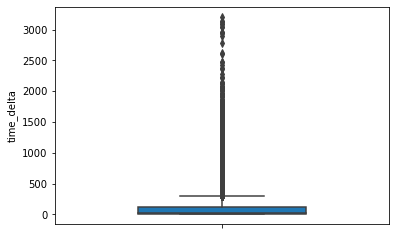

In [43]:
sns.boxplot(y = 'time_delta', data = df, saturation = 1, width = 0.5)

In [44]:
df['date_ultimate_reviews'].sort_values(ascending = False).head(20)

26781   2018-02-26
30334   2018-02-26
12019   2018-02-26
22263   2018-02-26
22880   2018-02-26
28928   2018-02-26
37689   2018-02-26
24797   2018-02-26
7866    2018-02-26
8135    2018-02-26
15088   2018-02-26
37663   2018-02-26
4000    2018-02-26
33662   2018-02-26
5635    2018-02-26
10600   2018-02-26
18511   2018-02-26
1592    2018-02-26
25110   2018-02-26
19050   2018-02-26
Name: date_ultimate_reviews, dtype: datetime64[ns]

Много значений признака delta_time выходят за значение верхнего квартиля. При этом дата последнего отзыва не выбивается из временного интервала. Может быть ошибка в ведении времени предыдущего отзыва. В данном случае значения не корректирую.

### Добавление признака: mean_ranking - средний ранг по городам, mean_cuisine - среднее количество кухонь по городам, mean_timedelta - среднее значение промежутка времени между оставленными отзывами

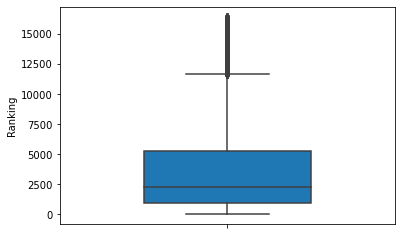

In [45]:
sns.boxplot(y = 'Ranking', data = df, saturation = 1, width = 0.5)

In [46]:
df['Ranking'].max()

16444.0

Ranking изменяется от 0 до 16444. За верхний межквартильный интервал попадает целая группа значений. Считаем, что в данном признаке выбросов нет.

In [47]:
#создадим словарь с параметрами Key - город, values - среднее значение оценки
mean_ranking_city = {}  
for item in city:  # перебираем список городов
    mean_ranking_city[item] = round(df[df['City'] == item]['Ranking'].mean(), 3)
mean_ranking_city

{'Paris': 6933.012,
 'Stockholm': 1242.387,
 'London': 8198.462,
 'Berlin': 3266.237,
 'Munich': 1370.54,
 'Oporto': 738.474,
 'Milan': 3098.144,
 'Bratislava': 453.113,
 'Vienna': 1706.102,
 'Rome': 2983.397,
 'Barcelona': 3914.144,
 'Madrid': 4388.423,
 'Dublin': 983.725,
 'Brussels': 1535.347,
 'Zurich': 782.487,
 'Warsaw': 1063.04,
 'Budapest': 1220.811,
 'Copenhagen': 974.7,
 'Amsterdam': 1580.944,
 'Lyon': 1307.559,
 'Hamburg': 1355.14,
 'Lisbon': 1877.126,
 'Prague': 2077.387,
 'Oslo': 568.288,
 'Helsinki': 566.91,
 'Edinburgh': 873.042,
 'Geneva': 708.287,
 'Ljubljana': 239.907,
 'Athens': 881.108,
 'Luxembourg': 313.719,
 'Krakow': 614.553}

In [48]:
#Добавляем признак
df['mean_ranking'] = df['City'].replace(to_replace = mean_ranking_city)
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key,quantity_cs,type_cuisin,date_ultimate_reviews,date_penultimate_reviews,time_delta,mean_ranking
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2,3,"European,French,other",2017-12-31,2017-11-20,41,6933.012
1,id_1535,Stockholm,[No_name],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,No_name,2017-07-06,2016-06-19,382,1242.387


In [49]:
#создадим словарь с параметрами Key - город, values - среднее значение количества кухонь
mean_cuisine_city = {}  
for item in city:  # перебираем список городов
    mean_cuisine_city[item] = round(df[df['City'] == item]['quantity_cs'].mean(), 3)
mean_cuisine_city

{'Paris': 2.159,
 'Stockholm': 2.505,
 'London': 2.961,
 'Berlin': 2.289,
 'Munich': 2.458,
 'Oporto': 2.729,
 'Milan': 2.509,
 'Bratislava': 2.252,
 'Vienna': 2.756,
 'Rome': 3.211,
 'Barcelona': 2.65,
 'Madrid': 2.087,
 'Dublin': 3.287,
 'Brussels': 2.497,
 'Zurich': 3.006,
 'Warsaw': 2.55,
 'Budapest': 3.252,
 'Copenhagen': 2.719,
 'Amsterdam': 3.311,
 'Lyon': 1.635,
 'Hamburg': 1.937,
 'Lisbon': 2.639,
 'Prague': 2.836,
 'Oslo': 3.036,
 'Helsinki': 2.556,
 'Edinburgh': 3.795,
 'Geneva': 2.624,
 'Ljubljana': 3.295,
 'Athens': 2.592,
 'Luxembourg': 2.681,
 'Krakow': 3.178}

In [50]:
df['mean_cuisin'] = df['City'].replace(to_replace = mean_cuisine_city)
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key,quantity_cs,type_cuisin,date_ultimate_reviews,date_penultimate_reviews,time_delta,mean_ranking,mean_cuisin
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2,3,"European,French,other",2017-12-31,2017-11-20,41,6933.012,2.159
1,id_1535,Stockholm,[No_name],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,No_name,2017-07-06,2016-06-19,382,1242.387,2.505


In [51]:
#создадим словарь с параметрами Key - город, values - среднее значение разницы во времени между отзывами
mean_timedelta_city = {}  
for item in city:  # перебираем список городов
    mean_timedelta_city[item] = round(df[df['City'] == item]['time_delta'].mean(), 3)
mean_timedelta_city

{'Paris': 119.633,
 'Stockholm': 111.883,
 'London': 91.303,
 'Berlin': 122.805,
 'Munich': 118.894,
 'Oporto': 73.895,
 'Milan': 103.565,
 'Bratislava': 121.751,
 'Vienna': 113.564,
 'Rome': 93.923,
 'Barcelona': 98.887,
 'Madrid': 83.63,
 'Dublin': 90.327,
 'Brussels': 118.692,
 'Zurich': 122.442,
 'Warsaw': 101.006,
 'Budapest': 98.032,
 'Copenhagen': 94.871,
 'Amsterdam': 76.276,
 'Lyon': 98.852,
 'Hamburg': 128.177,
 'Lisbon': 96.593,
 'Prague': 105.299,
 'Oslo': 109.468,
 'Helsinki': 126.747,
 'Edinburgh': 64.341,
 'Geneva': 115.757,
 'Ljubljana': 130.831,
 'Athens': 104.368,
 'Luxembourg': 128.124,
 'Krakow': 89.515}

In [52]:
df['mean_timedelta'] = df['City'].replace(to_replace = mean_timedelta_city)
df.head(2)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,prise_range_key,quantity_cs,type_cuisin,date_ultimate_reviews,date_penultimate_reviews,time_delta,mean_ranking,mean_cuisin,mean_timedelta
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2,3,"European,French,other",2017-12-31,2017-11-20,41,6933.012,2.159,119.633
1,id_1535,Stockholm,[No_name],1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,1,No_name,2017-07-06,2016-06-19,382,1242.387,2.505,111.883


### Анализ пропущенных значений в столбце Price Range

In [53]:
# анализ по столбцу prise_range_key
print(df[df['prise_range_key'] == 0]['Ranking'].mean())
print(df[df['prise_range_key'] == 1]['Ranking'].mean())
print(df[df['prise_range_key'] == 2]['Ranking'].mean())
print(df[df['prise_range_key'] == 3]['Ranking'].mean())
print(df['Ranking'].mean())

4861.267967737289
3553.3860487338748
2955.9098414077775
1968.8341531974702
3676.028525


Среднее значение Ranking при prise_range_key = 0 превышает величину средниго значения для остальных категорий

In [54]:
city_pass_price_unique = list(df[df['prise_range_key'] == 0]['City'].unique())
city_pass_price = list(df[df['prise_range_key'] == 0]['City'])

пропущенные значения присутствуют во всех городах

In [55]:
#Распределение пропусков по городам
pass_price_range = {}  
for item in city_pass_price_unique: 
    pass_price_range[item] = 0  
for item in city_pass_price:   
    pass_price_range[item] += 1   # увеличиваем значение нужного ключа в словаре на 1
pass_price_range

{'Stockholm': 380,
 'Berlin': 1009,
 'Oporto': 158,
 'Bratislava': 161,
 'Vienna': 454,
 'Barcelona': 936,
 'Madrid': 1370,
 'Budapest': 257,
 'Paris': 1579,
 'Copenhagen': 227,
 'Lyon': 421,
 'Milan': 851,
 'Lisbon': 440,
 'London': 1610,
 'Warsaw': 289,
 'Dublin': 167,
 'Helsinki': 131,
 'Amsterdam': 248,
 'Brussels': 373,
 'Prague': 555,
 'Rome': 427,
 'Hamburg': 517,
 'Athens': 198,
 'Oslo': 120,
 'Luxembourg': 62,
 'Zurich': 164,
 'Munich': 329,
 'Geneva': 156,
 'Krakow': 139,
 'Ljubljana': 55,
 'Edinburgh': 103}

In [56]:
#рассмотрим часто встречающиеся значения в prise_range_key по городам
pass_price_mode = {}
for item in city_pass_price_unique: 
    pass_price_range[item] = int(df[(df['City'] == item) & (df['prise_range_key'] != 0)]['prise_range_key'].mode())
pass_price_range

{'Stockholm': 2,
 'Berlin': 2,
 'Oporto': 2,
 'Bratislava': 2,
 'Vienna': 2,
 'Barcelona': 2,
 'Madrid': 2,
 'Budapest': 2,
 'Paris': 2,
 'Copenhagen': 2,
 'Lyon': 2,
 'Milan': 2,
 'Lisbon': 2,
 'London': 2,
 'Warsaw': 2,
 'Dublin': 2,
 'Helsinki': 2,
 'Amsterdam': 2,
 'Brussels': 2,
 'Prague': 2,
 'Rome': 2,
 'Hamburg': 2,
 'Athens': 2,
 'Oslo': 2,
 'Luxembourg': 2,
 'Zurich': 2,
 'Munich': 2,
 'Geneva': 2,
 'Krakow': 2,
 'Ljubljana': 2,
 'Edinburgh': 2}

Во всех городах наиболее часто встречаются рестораны со средним уровнем цен. Заменим пропуски в соответствии с кодировкой $$-$$$ - 2

In [57]:
df['prise_range_key'] = df['prise_range_key'].apply(lambda x: 2 if x == 0 else x)
df['prise_range_key'].unique()

array([2, 3, 1])

### Таблица для обучения модени

In [58]:
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())

In [59]:
df_study = df[['Restaurant_id','Ranking','Rating', 'Number of Reviews','prise_range_key','quantity_cs','time_delta',\
              'mean_ranking', 'mean_cuisin', 'mean_timedelta']]

In [60]:
df_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   Ranking            40000 non-null  float64
 2   Rating             40000 non-null  float64
 3   Number of Reviews  40000 non-null  float64
 4   prise_range_key    40000 non-null  int64  
 5   quantity_cs        40000 non-null  int64  
 6   time_delta         40000 non-null  int64  
 7   mean_ranking       40000 non-null  float64
 8   mean_cuisin        40000 non-null  float64
 9   mean_timedelta     40000 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.1+ MB


In [61]:
df_study_dummy = pd.concat([df_study, df_dummies],axis=1)
df_study_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        40000 non-null  object 
 1   Ranking              40000 non-null  float64
 2   Rating               40000 non-null  float64
 3   Number of Reviews    40000 non-null  float64
 4   prise_range_key      40000 non-null  int64  
 5   quantity_cs          40000 non-null  int64  
 6   time_delta           40000 non-null  int64  
 7   mean_ranking         40000 non-null  float64
 8   mean_cuisin          40000 non-null  float64
 9   mean_timedelta       40000 non-null  float64
 10  Asian                40000 non-null  int64  
 11  Bar                  40000 non-null  int64  
 12  European             40000 non-null  int64  
 13  French               40000 non-null  int64  
 14  Gluten Free Options  40000 non-null  int64  
 15  Italian              40000 non-null 

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [62]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df_study_dummy.drop(['Restaurant_id', 'Rating','time_delta'], axis = 1)
y = df_study_dummy['Rating']

In [63]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [64]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [65]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [66]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [67]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21381699999999995
